## AGENDA:
### PART I. SGD Implementation from scratch on Boston dataset.
### PART II. SGD Implementation using Sklearn library.

## PART I. SGD Implementation from scratch on Boston dataset.

In [31]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

## step 1. Load the boston dataset :

In [32]:
X = load_boston().data
Y = load_boston().target

In [33]:
X.shape

(506, 13)

## Step 2. split the dataset into train and test:

In [34]:
# split the data set into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

## step 3. Normalize the train and test dataset:

## Use Standard Scalar function to standardize your dataset. Here, we only fit the train data because we don’t want our model to see this data before, so as to avoid overfitting.

In [35]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
## shape of X_train before adding "Price" feature
X_train.shape

(354, 13)

## Step 4. Creating the DataFrame for both train and test dataset.

In [37]:
X_train = pd.DataFrame(data = X_train, columns=load_boston().feature_names)
X_train['Price'] = list(y_train)  
X_test = pd.DataFrame(data = X_test, columns=load_boston().feature_names)
X_test['Price'] = list(y_test)

In [38]:
## shape of X_train after adding "Price" feature
X_train.shape

(354, 14)

In [39]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,-0.207356,-0.499979,1.548016,-0.263603,0.588213,-1.839367,1.107402,-1.125110,-0.618160,0.206735,1.227257,0.424543,3.108073,14.4
1,-0.388865,0.346774,-0.589747,-0.263603,-0.797821,0.327487,-0.367661,0.075090,-0.733637,-1.049493,0.056963,0.401853,-0.666430,24.4
2,-0.335735,-0.499979,1.548016,-0.263603,0.588213,0.037907,1.043114,-0.799984,-0.618160,0.206735,1.227257,0.398461,0.639367,18.1
3,-0.394852,2.463658,-1.265584,-0.263603,-1.352235,0.052172,-1.746292,1.968937,-0.502683,-0.257013,-1.653466,0.089342,-1.056896,22.5
4,-0.391456,-0.499979,2.086394,-0.263603,0.215716,-0.495604,0.853820,-0.811511,-0.849114,-1.254951,0.282020,0.204545,0.776596,20.5


## Step 5. Below is the loss function for our Linear Model that we need to minimize.
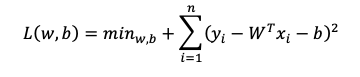
## Now, we calculate the gradients for our loss function L w.r.t Weights(W) and Intercept (b). Following is the equations for calculating the gradients,
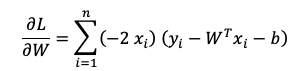


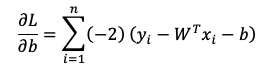
## After calculating the gradients we keep changing our weights and intercept value with each iteration.
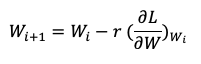



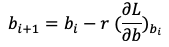
## Finally, we’ll implement our SGD function.

## Step 6. sgd regressor function implementation:

In [40]:
def sgd_regressor_train(X, y, learning_rate=0.2, n_epochs=1000, n=40):
    """
    X -> Training dataset
    y -> Training output (dependant variable)
    n_epochs -> Number of epochs
    n -> number of samples chosen from total "N" examples
    """
    
    w = np.random.randn(1,13)  # Randomly initializing weights
    b = np.random.randn(1,1)   # Random intercept value
    wdiff = np.full((1,13),1)
    epoch=1
    sqLoss = []
    wgts = [] ## append with the weight for every epoch -> len(wgts) = number of epochs
    while epoch <= n_epochs:
        
        temp = X.sample(n) # taking n samples from total X_train dataset

        X_tr = temp.iloc[:,0:13].values # take all the rows, with columns or features from 0 to 13
        y_tr = temp.iloc[:,-1].values # take all the rows with last column
        
        sum_Lw = np.full((1,13),0) # initialize the derivative of loss function w.r.t "w" (Needed to sum over all samples of "n")

        sum_Lb = np.full((1,1),0) # initialize the derivative of loss function w.r.t "b" (Needed to sum over all samples of "n")
        
        #loss = 0 
        y_pred = []
        sq_loss = []

        for i in range(n):
          for j in range(n):
            sum_Lw = ((-2 * X_tr[j]) * (y_tr[j] - np.dot(X_tr[j],w.T) - b) + (sum_Lw)) # sum of loss over all n sample dataset
            sum_Lb = ((-2) * (y_tr[j] - np.dot(X_tr[j],w.T) - b) + (sum_Lb))

          wold = w # w from last epoch

          # no of times "w" calculation = number of epoch * number of samples chosen

          ## w & b are calculated "n" times in 1 epoch, total number of times "w" is calculated = n * number of epochs = 40 *1000 = 40000
          w = w - learning_rate * (sum_Lw)/n # (sum_Lw)/n is to get the average loss over all n sample dataset 
          b = b - learning_rate * (sum_Lb)/n  
          wnew = w
          
          if (wnew == wold).any(): # to check whether new weight is same as previous weight vector
            break
          else:
            w = wnew
            y_predicted = np.dot(X_tr[i],w.T) 
            y_pred.append(y_predicted)

        loss = mean_squared_error(y_pred, y_tr)
        print("Epoch: %d, Loss: %.3f" %(epoch, loss))
        epoch+=1
        learning_rate = learning_rate/1.02
        sq_loss.append(loss)
        sqLoss.append(loss)
        wgts.append(w) # append the latest "w" of current epoch
    return w,b,sqLoss,y_pred,wgts



## Step 7. Prediction on Test dataset with the learned weights during training and compute y_test:

In [41]:
def predict(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        temp_ = x
        X_test = temp_.iloc[:,0:13].values
        y = np.asscalar(np.dot(w,X_test[i])+b)
        y_pred.append(y)
    return np.array(y_pred)
w,b,sq_loss_train,y_pred,wgts = sgd_regressor_train(X_train,y_train)
y_pred_customsgd = predict(X_test,w,b)

Epoch: 1, Loss: 898.535
Epoch: 2, Loss: 787.348
Epoch: 3, Loss: 720.227
Epoch: 4, Loss: 593.974
Epoch: 5, Loss: 555.969
Epoch: 6, Loss: 607.611
Epoch: 7, Loss: 804.232
Epoch: 8, Loss: 742.191
Epoch: 9, Loss: 719.217
Epoch: 10, Loss: 649.220
Epoch: 11, Loss: 908.699
Epoch: 12, Loss: 936.694
Epoch: 13, Loss: 854.002
Epoch: 14, Loss: 859.342
Epoch: 15, Loss: 934.986
Epoch: 16, Loss: 599.797
Epoch: 17, Loss: 697.111
Epoch: 18, Loss: 765.141
Epoch: 19, Loss: 726.277
Epoch: 20, Loss: 455.195
Epoch: 21, Loss: 818.340
Epoch: 22, Loss: 638.643
Epoch: 23, Loss: 771.832
Epoch: 24, Loss: 583.975
Epoch: 25, Loss: 447.912
Epoch: 26, Loss: 626.857
Epoch: 27, Loss: 627.882
Epoch: 28, Loss: 447.561
Epoch: 29, Loss: 747.195
Epoch: 30, Loss: 606.966
Epoch: 31, Loss: 613.866
Epoch: 32, Loss: 621.615
Epoch: 33, Loss: 691.543
Epoch: 34, Loss: 519.286
Epoch: 35, Loss: 621.037
Epoch: 36, Loss: 532.514
Epoch: 37, Loss: 513.391
Epoch: 38, Loss: 665.995
Epoch: 39, Loss: 543.272
Epoch: 40, Loss: 520.989
Epoch: 41

## Step 8. Plot of y_actual and y_predicted:

-> x-axis : index of the output variable

-> y-axis : value of the output variable (Price)

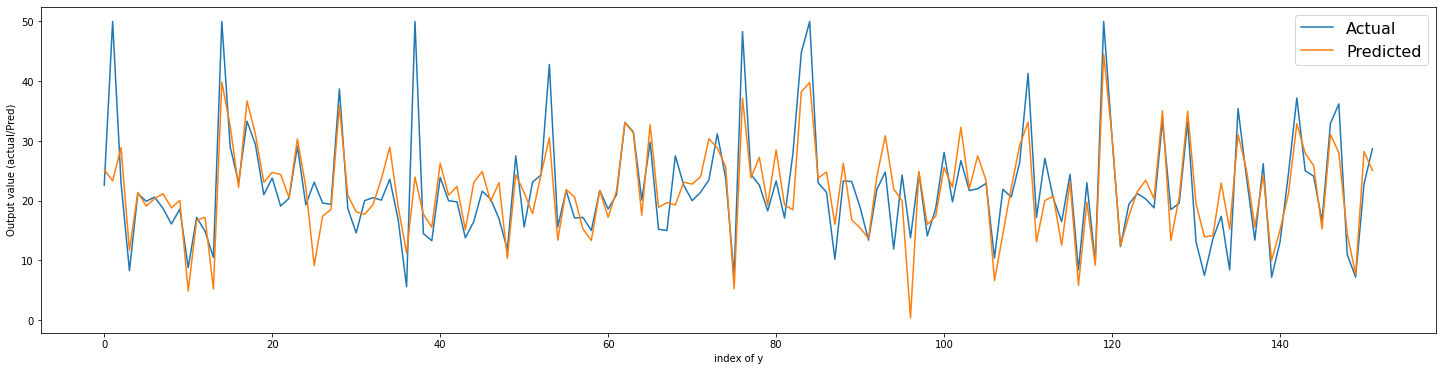

Mean Squared Error : 27.617607736763688


In [42]:
from matplotlib.pyplot import figure
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_customsgd, label='Predicted')
plt.xlabel('index of y')
plt.ylabel('Output value (actual/Pred)')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred_customsgd))

## As we can see we got our MSE as 27.617 which is pretty decent.

## Step 9. sgd regressor on test dataset:

In [43]:
w_test,b_test,sq_loss_test,y_test_pred,wgts_test = sgd_regressor_train(X_test,y_test)

Epoch: 1, Loss: 741.858
Epoch: 2, Loss: 774.118
Epoch: 3, Loss: 570.866
Epoch: 4, Loss: 565.839
Epoch: 5, Loss: 638.394
Epoch: 6, Loss: 529.590
Epoch: 7, Loss: 551.996
Epoch: 8, Loss: 532.818
Epoch: 9, Loss: 605.366
Epoch: 10, Loss: 656.477
Epoch: 11, Loss: 499.728
Epoch: 12, Loss: 513.572
Epoch: 13, Loss: 479.706
Epoch: 14, Loss: 561.650
Epoch: 15, Loss: 624.898
Epoch: 16, Loss: 724.299
Epoch: 17, Loss: 438.822
Epoch: 18, Loss: 472.782
Epoch: 19, Loss: 658.765
Epoch: 20, Loss: 539.989
Epoch: 21, Loss: 618.038
Epoch: 22, Loss: 644.908
Epoch: 23, Loss: 541.176
Epoch: 24, Loss: 514.920
Epoch: 25, Loss: 556.919
Epoch: 26, Loss: 640.052
Epoch: 27, Loss: 633.142
Epoch: 28, Loss: 695.162
Epoch: 29, Loss: 507.465
Epoch: 30, Loss: 570.767
Epoch: 31, Loss: 571.693
Epoch: 32, Loss: 672.571
Epoch: 33, Loss: 485.588
Epoch: 34, Loss: 667.690
Epoch: 35, Loss: 1375.061
Epoch: 36, Loss: 690.422
Epoch: 37, Loss: 753.792
Epoch: 38, Loss: 653.678
Epoch: 39, Loss: 757.250
Epoch: 40, Loss: 720.661
Epoch: 4

## Step 10. Plot the loss vs number of epoch for both train and test dataset:

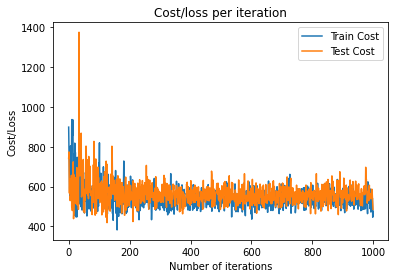

In [44]:
plt.figure()
plt.plot(range(len(sq_loss_train)), np.reshape(sq_loss_train,[len(sq_loss_train), 1]), label = "Train Cost")
plt.plot(range(len(sq_loss_test)), np.reshape(sq_loss_test, [len(sq_loss_test), 1]), label = "Test Cost")
plt.title("Cost/loss per iteration")
plt.xlabel("Number of iterations")
plt.ylabel("Cost/Loss")
plt.legend()
plt.show()

### Part II. Implementing SKlearn’s SGD Regressor

## Step 1. Import necessary libraries:

In [45]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

## Step 2. Comparing our Predicted Values v/s the Actual Values



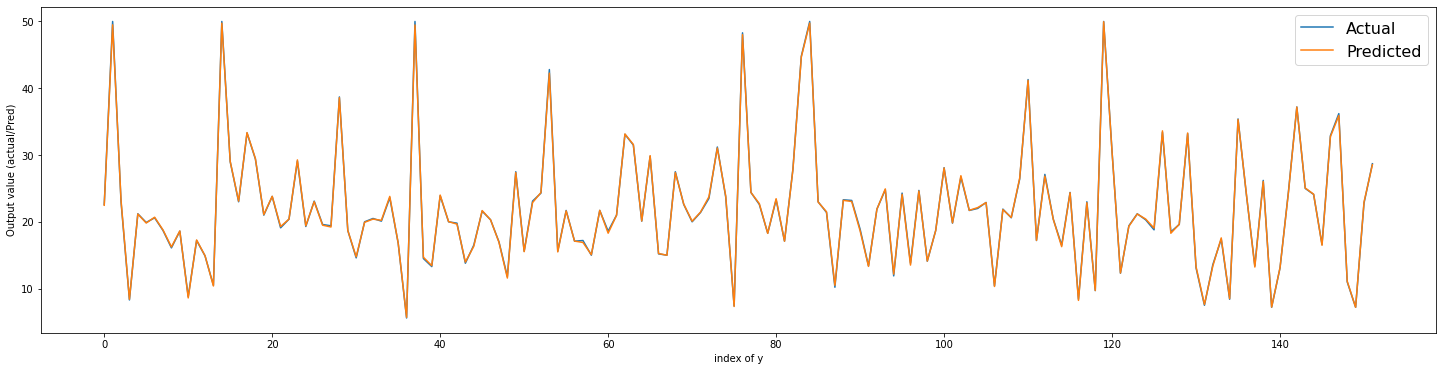

Mean Squared Error using Sklearn : 0.02284213291151896


In [47]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('index of y')
plt.ylabel('Output value (actual/Pred)')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error using Sklearn :',mean_squared_error(y_test, y_pred))

## CONCLUSION : 
### SGD Implementation from scratch results (MSE) can be improved with additional hyper parameter tuning. Like:

##### 1. increasing the number of epochs
##### 2. Increasing the number of samples considered
##### 3. Using smaller learning rate & changing at every epoch
